In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame

Reading Dataset

In [3]:
dataset = pd.read_csv("./data/netflix_data/netflix_data.csv")
print(dataset.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [435]:
data_set_1 = dataset.drop(columns=["show_id","type","title","director","cast","country","listed_in","description"])


In [436]:
def change_text_to_mins(duration:str)-> float:
    if "Season" not in str(duration) and str(duration)!="nan":
        num, mins = duration.split(" ")
        return int(num)
    else:
        return np.nan

Cleaning Seasons and Minutes to just numbers

In [437]:
data_set_1["duration"] = data_set_1["duration"].map(change_text_to_mins)
print(data_set_1["duration"])

0        90.0
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
8802    158.0
8803      NaN
8804     88.0
8805     88.0
8806    111.0
Name: duration, Length: 8807, dtype: float64


Turning Different Ratings to Generalized Groups

In [438]:
rating_dict = {"TV-Y":"G", "TV-G":"G", "TV-Y7":"G", "TV-Y7-FV":"G", "PG-13":"PG", "TV-14":"PG", "TV-PG":"PG", "TV-MA":"R", "NC-17":"R", "NR":"Unrated", "UR":"Unrated"}

data_set_1 = data_set_1.replace({"rating":rating_dict})

print(data_set_1["rating"])

0       PG
1        R
2        R
3        R
4        R
        ..
8802     R
8803     G
8804     R
8805    PG
8806    PG
Name: rating, Length: 8807, dtype: object


In [439]:
print(data_set_1.size)
data_set_1 = data_set_1.dropna()
print(data_set_1.size)

35228
24504


In [440]:
data_set_1.to_pickle("./data/data_set_1.pickle")

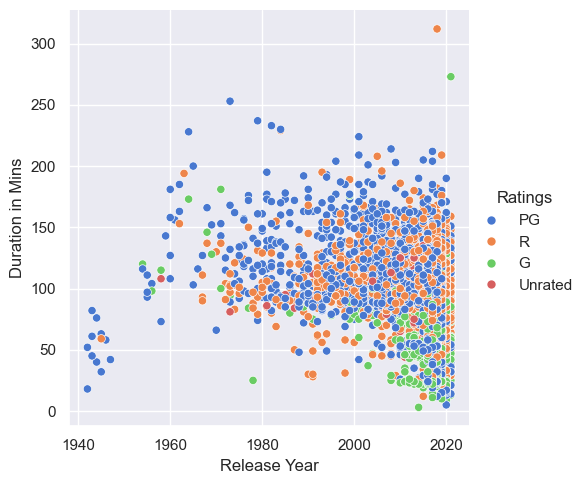

In [ ]:
sns.set_theme(style = "darkgrid")

labelss = ["G", "PG", "R"]
titles = "Ratings"

p = sns.relplot(data=data_set_1,x="release_year", y="duration", hue = "rating",palette="muted", alpha = 1)
p.set_axis_labels(x_var="Release Year", y_var= "Duration in Mins")
p._legend.set_title('Ratings')

plt.show()

Making new dataset

In [442]:
dataset = dataset.dropna()
data_set_2 = pd.DataFrame([],
columns=['Release Year', 'Movies Released'])
print(data_set_2)

Empty DataFrame
Columns: [Release Year, Movies Released]
Index: []


Initializing dataset 2

In [443]:
index = 0
for i in range(data_set_1['release_year'].min(), int(data_set_1['release_year'].max())+1):
    data_set_2.loc[index, "Release Year"] = int(i)
    data_set_2.loc[index, "Movies Released"] = 0
    index += 1
print(data_set_2)

   Release Year Movies Released
0          1942               0
1          1943               0
2          1944               0
3          1945               0
4          1946               0
..          ...             ...
75         2017               0
76         2018               0
77         2019               0
78         2020               0
79         2021               0

[80 rows x 2 columns]


Transferring data from dataset to dataset 2

In [444]:
data_set_2["Movies Released"]=pd.to_numeric(data_set_2["Movies Released"])
min_year = data_set_1['release_year'].min()
for year in dataset["release_year"]:
    current_amt = int((data_set_2.loc[int(year)-min_year, "Movies Released"]))
    data_set_2.loc[int(year)-min_year, "Movies Released"] = current_amt + 1
    index += 1
print(data_set_2)

   Release Year  Movies Released
0          1942                1
1          1943                0
2          1944                1
3          1945                1
4          1946                1
..          ...              ...
75         2017              657
76         2018              648
77         2019              519
78         2020              442
79         2021              161

[80 rows x 2 columns]


Making and Showing chart for release year vs # of movies released

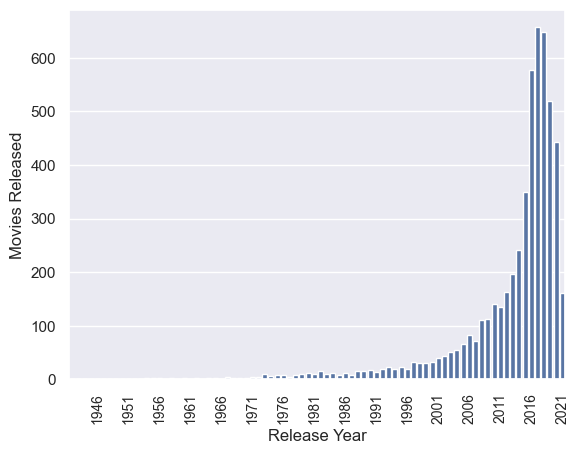

In [445]:
sns.set_theme(style = "darkgrid")
sns.barplot(data=data_set_2, x="Release Year", y="Movies Released", alpha = 1)
plt.xticks(rotation = 90, fontsize = 10)
tick_labels = plt.gca().get_xticklabels()
for i, label in enumerate(tick_labels):
    if i % 5 != 4:
        label.set_visible(False)
plt.show()

Making List of all possible Movie tags

In [446]:
tags_list = []
for tags in dataset["listed_in"]:
    tag_list = tags.split(", ")
    for tag in tag_list:
        if tag not in tags_list:
            tags_list.append(tag)
print(tags_list)

['Dramas', 'Independent Movies', 'International Movies', 'British TV Shows', 'Reality TV', 'Comedies', 'Romantic Movies', 'Horror Movies', 'Sci-Fi & Fantasy', 'Thrillers', 'Action & Adventure', 'Classic Movies', 'Anime Features', 'Children & Family Movies', 'Documentaries', 'Music & Musicals', 'Cult Movies', 'Faith & Spirituality', 'LGBTQ Movies', 'Crime TV Shows', 'International TV Shows', 'TV Dramas', 'Romantic TV Shows', 'Spanish-Language TV Shows', 'Stand-Up Comedy', 'TV Shows', 'Movies', 'TV Comedies', 'Sports Movies', 'TV Action & Adventure', 'TV Sci-Fi & Fantasy', 'TV Mysteries', 'Docuseries', 'Anime Series', 'TV Horror', 'Teen TV Shows', 'Korean TV Shows', 'Stand-Up Comedy & Talk Shows', "Kids' TV", 'Classic & Cult TV', 'TV Thrillers', 'Science & Nature TV']


Making and Initializing dataset 3 

In [447]:
data_set_3 = pd.DataFrame([],
columns=['Number Of Movies'])
for i in range(len(tags_list)):
    data_set_3.loc[i, "Number Of Movies"] = 0

data_set_3.index = tags_list
print(data_set_3)

                             Number Of Movies
Dramas                                      0
Independent Movies                          0
International Movies                        0
British TV Shows                            0
Reality TV                                  0
Comedies                                    0
Romantic Movies                             0
Horror Movies                               0
Sci-Fi & Fantasy                            0
Thrillers                                   0
Action & Adventure                          0
Classic Movies                              0
Anime Features                              0
Children & Family Movies                    0
Documentaries                               0
Music & Musicals                            0
Cult Movies                                 0
Faith & Spirituality                        0
LGBTQ Movies                                0
Crime TV Shows                              0
International TV Shows            

Adding Data to dataset 3

In [448]:
for tags in dataset["listed_in"]:
    tag_list = tags.split(", ")
    for tag in tag_list:
        data_set_3.at[tag, "Number Of Movies"] = data_set_3.at[tag, "Number Of Movies"]+1
data_set_3=data_set_3.sort_values("Number Of Movies", ascending = False)
print(data_set_3)

                             Number Of Movies
International Movies                     2369
Dramas                                   2293
Comedies                                 1553
Action & Adventure                        806
Independent Movies                        740
Romantic Movies                           579
Thrillers                                 547
Children & Family Movies                  503
Documentaries                             391
Horror Movies                             336
Stand-Up Comedy                           294
Music & Musicals                          292
Sci-Fi & Fantasy                          236
Sports Movies                             156
Classic Movies                            108
International TV Shows                     87
LGBTQ Movies                               80
Cult Movies                                69
Anime Features                             61
Faith & Spirituality                       58
TV Dramas                         

Making Chart for Number of Movies vs Type of Movies

C:\Users\senth\AppData\Local\Temp\ipykernel_34624\3374462636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_set_3, x=data_set_3.index, y="Number Of Movies", palette="muted", alpha = 1)


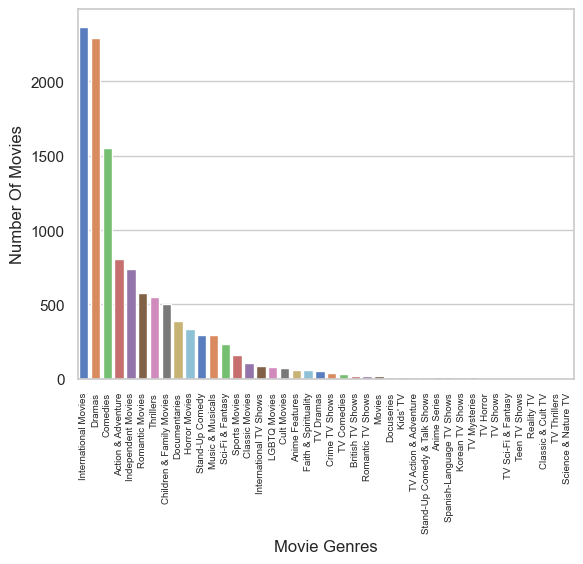

In [449]:
sns.set_theme(style = "whitegrid")
sns.barplot(data=data_set_3, x=data_set_3.index, y="Number Of Movies", palette="muted", alpha = 1)
plt.xticks(rotation = 90, fontsize = 7)
plt.xlabel("Movie Genres")
plt.show()

In [450]:
def check_if_horror(listed_in):
    if "Horror" in str(listed_in):
        return "Yes"
    else:
        return "No"

In [451]:
df_1: DataFrame = pd.read_pickle("./data/data_set_1.pickle")
print(df_1.size)
print(df_1)
print(dataset["listed_in"])
dataset["Horror Or Not"] = dataset["listed_in"].map(check_if_horror)
print(dataset["Horror Or Not"])


24504
              date_added  release_year rating  duration
0     September 25, 2021          2020     PG      90.0
6     September 24, 2021          2021     PG      91.0
7     September 24, 2021          1993      R     125.0
9     September 24, 2021          2021     PG     104.0
12    September 23, 2021          2021      R     127.0
...                  ...           ...    ...       ...
8801       March 9, 2016          2015      R      96.0
8802   November 20, 2019          2007      R     158.0
8804    November 1, 2019          2009      R      88.0
8805    January 11, 2020          2006     PG      88.0
8806       March 2, 2019          2015     PG     111.0

[6126 rows x 4 columns]
7       Dramas, Independent Movies, International Movies
8                           British TV Shows, Reality TV
9                                       Comedies, Dramas
12                          Dramas, International Movies
24       Comedies, International Movies, Romantic Movies
            

In [452]:
def convert_to_year_added(date):
    month_and_day, year = date.split(", ")
    return year

In [453]:
dataset["Year Added"] = dataset["date_added"].map(convert_to_year_added)


In [454]:
def make_only_horror_movies(horror_or_not):
    if horror_or_not == "Yes":
        return True
    else:
        return np.nan

In [455]:
horror_dataset = dataset.drop(columns=['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'])
horror_dataset["Horror Or Not"] = horror_dataset["Horror Or Not"].map(make_only_horror_movies)
horror_dataset = horror_dataset.dropna()
print(horror_dataset)
print((horror_dataset['Year Added'].max()), horror_dataset['Year Added'].min())

     Horror Or Not Year Added
28            True       2021
42            True       2021
43            True       2021
44            True       2021
200           True       2021
...            ...        ...
8722          True       2020
8760          True       2019
8765          True       2017
8782          True       2016
8804          True       2019

[343 rows x 2 columns]
2021 2009


In [456]:
horror_amt_dataset = pd.DataFrame([],
columns=['Year Added', 'Horror Movies Released'])
print(horror_amt_dataset)

Empty DataFrame
Columns: [Year Added, Horror Movies Released]
Index: []


In [457]:
index = 0
for i in range(int(horror_dataset['Year Added'].min()),int(horror_dataset['Year Added'].max())+1):
    horror_amt_dataset.loc[index, "Year Added"] = int(i)
    horror_amt_dataset.loc[index, "Horror Movies Released"] = 0
    index += 1
print(horror_amt_dataset)

   Year Added Horror Movies Released
0        2009                      0
1        2010                      0
2        2011                      0
3        2012                      0
4        2013                      0
5        2014                      0
6        2015                      0
7        2016                      0
8        2017                      0
9        2018                      0
10       2019                      0
11       2020                      0
12       2021                      0


In [458]:
horror_amt_dataset["Horror Movies Released"]=pd.to_numeric(horror_amt_dataset["Horror Movies Released"])
min_year = int(horror_dataset['Year Added'].min())
for year in horror_dataset["Year Added"]:
    current_amt = int((horror_amt_dataset.loc[int(year)-min_year, "Horror Movies Released"]))
    horror_amt_dataset.loc[int(year)-min_year, "Horror Movies Released"] = current_amt + 1
    index += 1
print(horror_amt_dataset)

   Year Added  Horror Movies Released
0        2009                       1
1        2010                       1
2        2011                       0
3        2012                       0
4        2013                       0
5        2014                       0
6        2015                       3
7        2016                       8
8        2017                      35
9        2018                      75
10       2019                      95
11       2020                      78
12       2021                      47


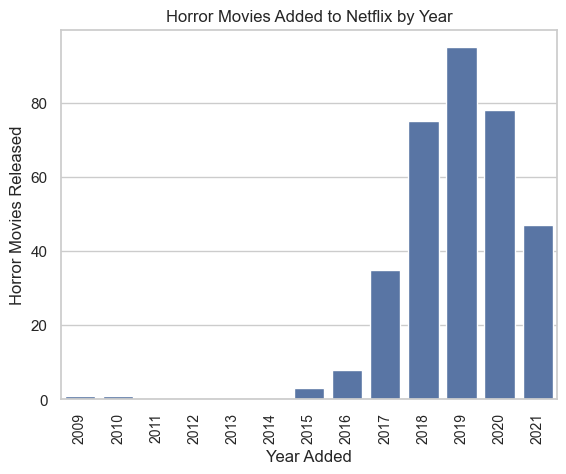

In [459]:
sns.set_theme(style = "whitegrid")
sns.barplot(data=horror_amt_dataset, x="Year Added", y="Horror Movies Released", alpha = 1)
# sns.lineplot(data=horror_amt_dataset, x="Year Added", y="Horror Movies Released", alpha = 1)
plt.xticks(rotation = 90, fontsize = 10)
plt.title("Horror Movies Added to Netflix by Year")
plt.show()

In [460]:
index = 0
for year in horror_amt_dataset["Year Added"]:
    if int(year) >= 2018:
        horror_amt_dataset.loc[index, "modern"]=True
    else:
        horror_amt_dataset.loc[index, "modern"]=False
    if int(year) % 2 == 0:
        horror_amt_dataset.loc[index, "even"]=True
    else:
        horror_amt_dataset.loc[index, "even"]=False
    index+=1
print(horror_amt_dataset)

   Year Added  Horror Movies Released modern   even
0        2009                       1  False  False
1        2010                       1  False   True
2        2011                       0  False  False
3        2012                       0  False   True
4        2013                       0  False  False
5        2014                       0  False   True
6        2015                       3  False  False
7        2016                       8  False   True
8        2017                      35  False  False
9        2018                      75   True   True
10       2019                      95   True  False
11       2020                      78   True   True
12       2021                      47   True  False


MultiFacet Grid

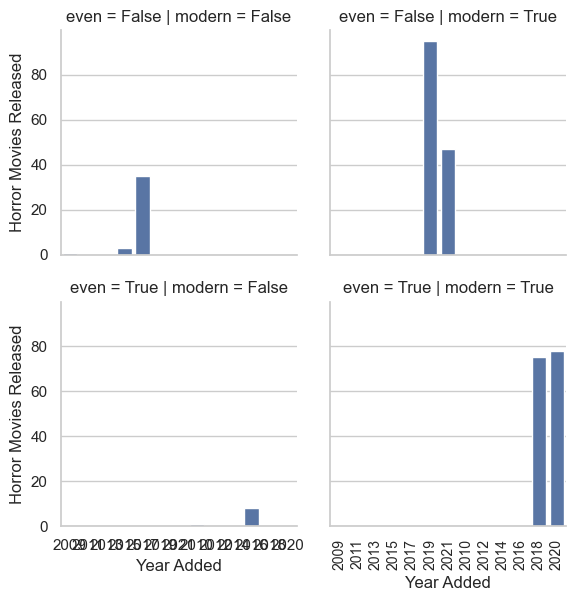

In [461]:
grid = sns.FacetGrid(
    data=horror_amt_dataset,
    col="modern", 
    row="even",   
)


grid.map_dataframe(
    sns.barplot,
    x="Year Added",
    y="Horror Movies Released",
)
plt.xticks(rotation = 90, fontsize = 10)

plt.show()


([<matplotlib.patches.Wedge at 0x17d04b49450>,
 [Text(1.0999538606794028, 0.010074938038387684, '2009'),
  Text(1.099584769337974, 0.03022143345300228, '2010'),
  Text(1.0992618482800953, 0.04029130074630038, '2011'),
  Text(1.0992618482800953, 0.04029130074630038, '2012'),
  Text(1.0992618482800953, 0.04029130074630038, '2013'),
  Text(1.0992618482800953, 0.04029130074630038, '2014'),
  Text(1.0977399318353314, 0.07047724493878985, '2015'),
  Text(1.085084585547482, 0.1805310006820146, '2016'),
  Text(0.9327342374780108, 0.5831010566242476, '2017'),
  Text(0.005037432784190462, 1.0999884655172276, '2018'),
  Text(-1.0998154513521163, 0.020148770859312715, '2019'),
  Text(-0.005037467748984321, -1.0999884653571046, '2020'),
  Text(0.9996417426299298, -0.4590385456492703, '2021')],
 [Text(0.5999748330978559, 0.005495420748211463, '0%'),
  Text(0.5997735105479859, 0.01648441824709215, '0%'),
  Text(0.5995973717891429, 0.021977073134345656, '0%'),
  Text(0.5995973717891429, 0.021977073134

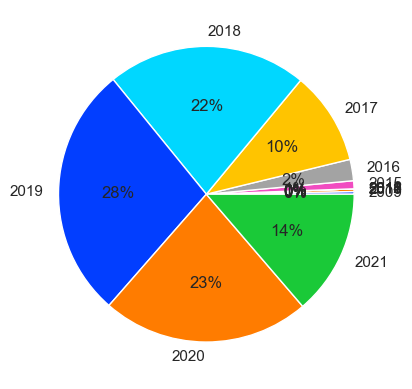

In [469]:
plt.pie(data = horror_amt_dataset,labels=horror_amt_dataset["Year Added"] ,colors=sns.color_palette('bright'), x = horror_amt_dataset["Horror Movies Released"], autopct='%.0f%%')